In [1]:
!pip install deepchem
import deepchem as dc
dc.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.1'

In [2]:
!pip install rdkit

In [3]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import io
from google.colab import files
import mols2grid

In [5]:
from google.colab import files
uploaded = files.upload()

Saving hansen_curated.xlsx to hansen_curated.xlsx


In [6]:
df2 = pd.read_excel('hansen_curated.xlsx')
df2 = df2.rename(columns={"mut": "y", "smiles": "ids"})
df2

,num,ids,cas,y,ROMol,morgan,w
0,0,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,2475-33-4,0,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
1,7,CC(=O)OC1(CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)C3CCC12...,105149-00-6,0,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
2,8,Nc1nc(N)nc(N)n1,108-78-1,0,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
3,9,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c(c1)[N+](=O)[O-],2425-85-6,1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892
4,10,CC(C)CC(=O)Nc1snc2ccccc12,67019-24-3,0,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
...,...,...,...,...,...,...,...
6396,6507,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,37319-17-8,0,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
6397,6508,OC(Cc1cn(N=O)c2ccccc12)C(=O)O,117333-21-8,1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892
6398,6509,COC(=O)Nc1nc2ccccc2[nH]1,10605-21-7,1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892
6399,6510,ClCc1cccc2c3cccc4cccc(c12)c34,103393-71-1,1,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892


,num,ids,cas,y,ROMol,morgan,w
0,0,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,2475-33-4,0,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
1,7,CC(=O)OC1(CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)C3CCC12...,105149-00-6,0,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
2,8,Nc1nc(N)nc(N)n1,108-78-1,0,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
3,9,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c(c1)[N+](=O)[O-],2425-85-6,1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892
4,10,CC(C)CC(=O)Nc1snc2ccccc12,67019-24-3,0,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
...,...,...,...,...,...,...,...
6396,6507,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,37319-17-8,0,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.856977
6397,6508,OC(Cc1cn(N=O)c2ccccc12)C(=O)O,117333-21-8,1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892
6398,6509,COC(=O)Nc1nc2ccccc2[nH]1,10605-21-7,1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892
6399,6510,ClCc1cccc2c3cccc4cccc(c12)c34,103393-71-1,1,,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.166892

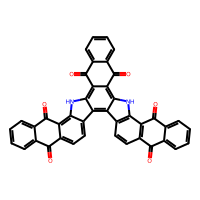
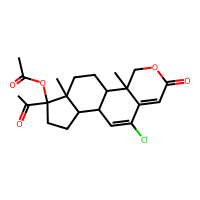
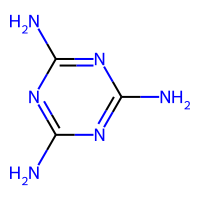
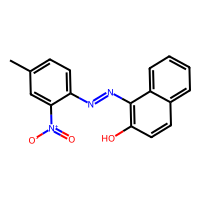
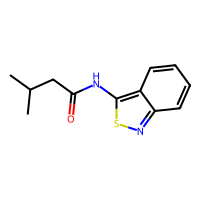
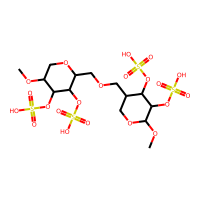
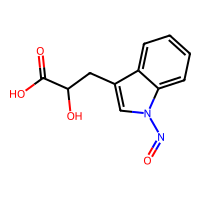
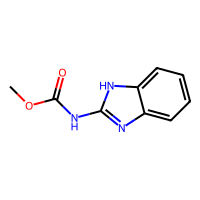
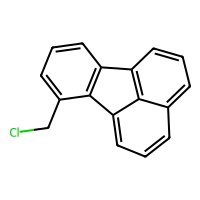
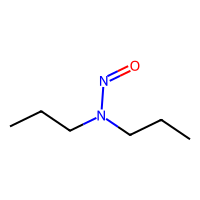

In [7]:
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol="ids")
df2

In [8]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

<ipython-input-8-f0dafa6ba427>:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  features.set_axis(list_X, axis=1,inplace=True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,0,1.856977
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,CC(=O)OC1(CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)C3CCC12...,0,1.856977
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nc1nc(N)nc(N)n1,0,1.856977
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c(c1)[N+](=O)[O-],1,2.166892
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(C)CC(=O)Nc1snc2ccccc12,0,1.856977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,0,1.856977
6397,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OC(Cc1cn(N=O)c2ccccc12)C(=O)O,1,2.166892
6398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COC(=O)Nc1nc2ccccc2[nH]1,1,2.166892
6399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ClCc1cccc2c3cccc4cccc(c12)c34,1,2.166892


In [9]:
# Convertig dataframe concat into NumpyDataset object (datasetnp)
datasetnp = dc.data.NumpyDataset.from_dataframe(df_featurized2)

# Creating a RandomSplitter object and splitting into just only train and valid datasets
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(datasetnp,frac_train = 0.8, frac_valid = 0.2, frac_test= 0.0)

In [10]:
n_tasks = 1
n_features = train_dataset.X.shape[1]

In [11]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [12]:
rf = RandomForestClassifier()
rf.fit(train_dataset.X,train_dataset.y.ravel())

RandomForestClassifier()

In [13]:
y_pred = rf.predict(valid_dataset.X)

In [14]:
accuracy = accuracy_score(valid_dataset.y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8134270101483216


In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=100,
                                 cv=cv)

# Fit the random search object to the data
rand_search.fit(train_dataset.X,train_dataset.y.ravel())

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7d549f91d690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7d549f91c160>})

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 449}


In [17]:
print(best_rf)

RandomForestClassifier(max_depth=18, n_estimators=449)


In [18]:
d = rand_search.best_params_
metric = dc.metrics.Metric(
dc.metrics.roc_auc_score, np.mean, mode="classification")
import sklearn
from sklearn.ensemble import RandomForestClassifier

best_rf = sklearn.ensemble.RandomForestClassifier(n_estimators= d['n_estimators'],
                                                        max_depth=d['max_depth'])
model = dc.models.SklearnModel(best_rf)

In [19]:
model.fit(train_dataset)
model.save()

In [20]:
print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric])
valid_scores = model.evaluate(valid_dataset, [metric])
print("Train scores")
print(train_scores)
print("Validation scores")
print(valid_scores)

Evaluating model
Train scores
{'mean-roc_auc_score': 0.9727891449308429}
Validation scores
{'mean-roc_auc_score': 0.8636143931256715}


In [21]:
print(best_rf)

RandomForestClassifier(max_depth=18, n_estimators=449)


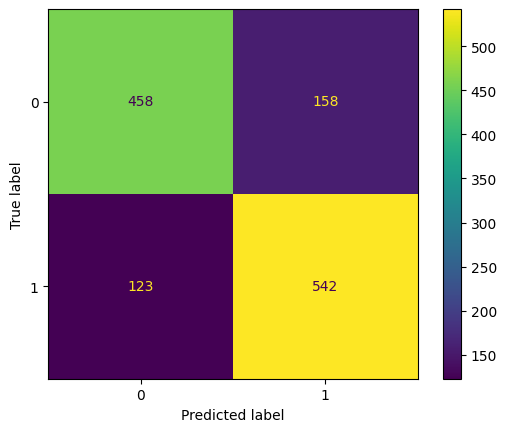

In [22]:
# Generate predictions with the best model
y_pred = best_rf.predict(valid_dataset.X)

# Create the confusion matrix
cm = confusion_matrix(valid_dataset.y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [23]:
from sklearn.metrics import f1_score

y_pred = best_rf.predict(valid_dataset.X)

accuracy = accuracy_score(valid_dataset.y, y_pred)
precision = precision_score(valid_dataset.y, y_pred)
recall = recall_score(valid_dataset.y, y_pred)

precision_s = precision_score(valid_dataset.y, y_pred,average='micro')
recall_s    = recall_score(valid_dataset.y, y_pred, average='micro')

print("Accuracy     : ", accuracy)
print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))

Accuracy     :  0.78064012490242
Precision    :  0.7742857142857142
Recall       :  0.8150375939849624
F1_score     :  0.78064012490242


In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(train_dataset.X, train_dataset.y)
y_pred = best_rf.predict(valid_dataset.X)
print("Accuracy score: " + str(accuracy_score(valid_dataset.y, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(valid_dataset.y, y_pred)))
print("\nClassification report: \n" + str(classification_report(valid_dataset.y, y_pred)))

Accuracy score: 0.78064012490242

Confusion matrix: 
[[458 158]
 [123 542]]

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       616
           1       0.77      0.82      0.79       665

    accuracy                           0.78      1281
   macro avg       0.78      0.78      0.78      1281
weighted avg       0.78      0.78      0.78      1281



[Text(0.5, 0.875, 'x[171] <= 0.5\nentropy = 0.995\nsamples = 5120\nvalue = [2338, 2782]'),
 Text(0.25, 0.625, 'x[725] <= 0.5\nentropy = 1.0\nsamples = 4326\nvalue = [2200, 2126]'),
 Text(0.125, 0.375, 'x[549] <= 0.5\nentropy = 0.993\nsamples = 3700\nvalue = [2037, 1663]'),
 Text(0.0625, 0.125, 'entropy = 0.976\nsamples = 3204\nvalue = [1895, 1309]'),
 Text(0.1875, 0.125, 'entropy = 0.864\nsamples = 496\nvalue = [142, 354]'),
 Text(0.375, 0.375, 'x[979] <= 0.5\nentropy = 0.827\nsamples = 626\nvalue = [163, 463]'),
 Text(0.3125, 0.125, 'entropy = 0.91\nsamples = 434\nvalue = [141, 293]'),
 Text(0.4375, 0.125, 'entropy = 0.514\nsamples = 192\nvalue = [22, 170]'),
 Text(0.75, 0.625, 'x[675] <= 0.5\nentropy = 0.666\nsamples = 794\nvalue = [138, 656]'),
 Text(0.625, 0.375, 'x[586] <= 0.5\nentropy = 0.716\nsamples = 695\nvalue = [137, 558]'),
 Text(0.5625, 0.125, 'entropy = 0.672\nsamples = 658\nvalue = [116, 542]'),
 Text(0.6875, 0.125, 'entropy = 0.987\nsamples = 37\nvalue = [21, 16]'),
 Te

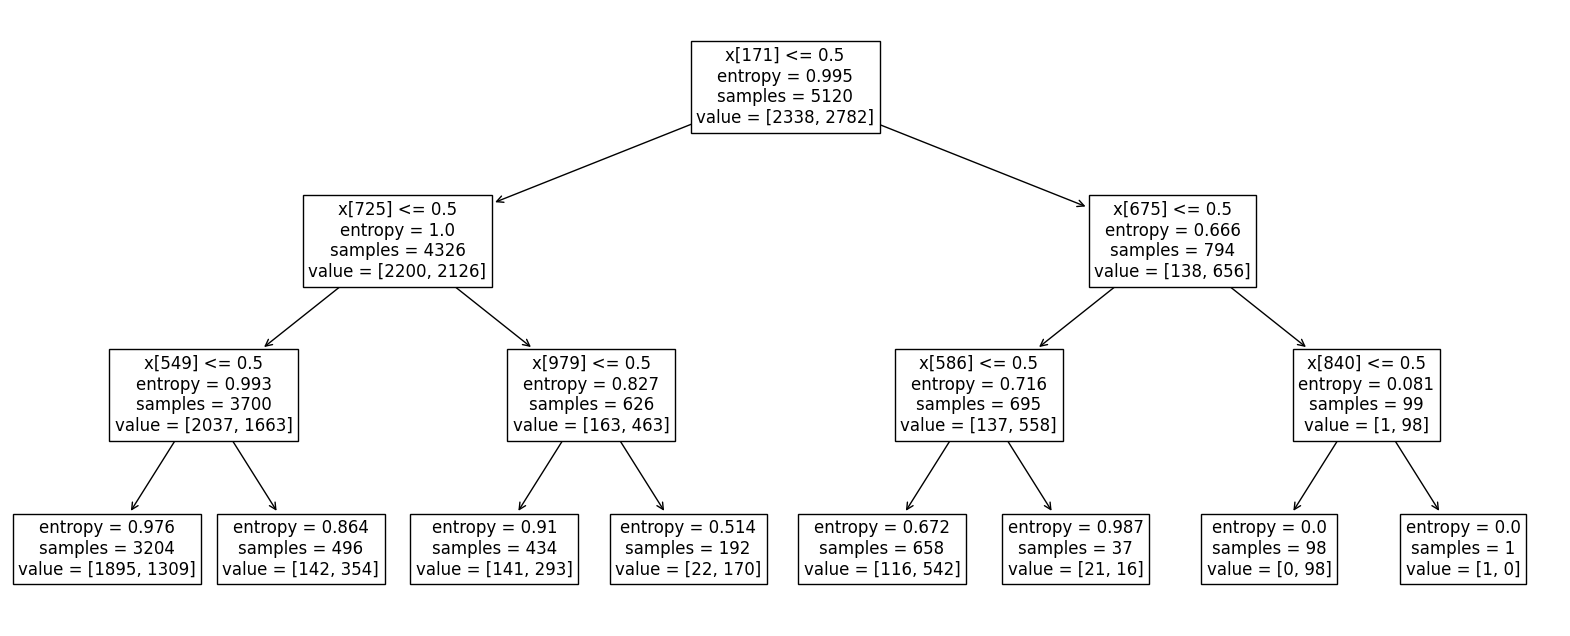

In [25]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…

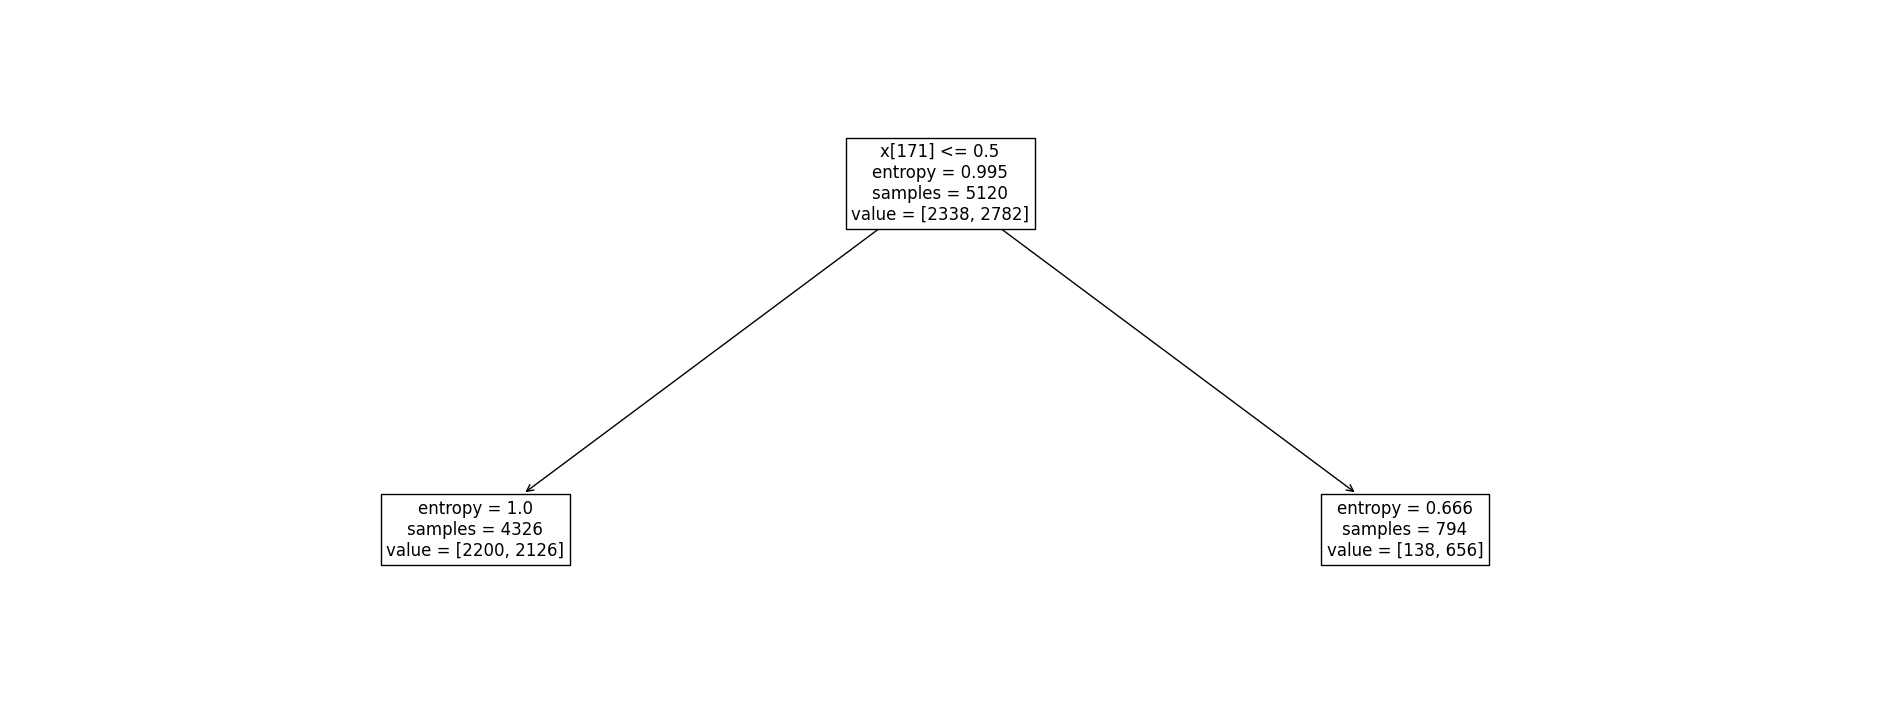

In [26]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(train_dataset.X, train_dataset.y)
  y_pred = best_rf.predict(valid_dataset.X)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact

The p value, or probability value, is a statistical measurement used to validate a hypothesis against observed data. It tells you how likely it is that your data could have occurred under the null hypothesis. The level of statistical significance is often expressed as a p-value between 0 and 1. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.

In [27]:
from scipy.stats import hypergeom

table = cm
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
fisher = pd.DataFrame(hypergeom.pmf(np.arange(start, end+1), M, n, N), columns=['p-value'])
fisher

,p-value
0,4.495930e-274
1,1.893030e-270
2,3.925836e-267
3,5.347350e-264
4,5.382502e-261
...,...
577,1.959373e-310
578,7.988326e-314
579,2.372294e-317
580,4.560226e-321


In [28]:
from scipy.stats import fisher_exact
pvalue = fisher_exact(table, alternative='two-sided')
pvalue[1]

2.3299120596074763e-94

##Explaining model (LIME)

In [29]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=97e998e61322513a362965e6d9d0f2052a47ed3986c24fdac2a6d80781d4d1bb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [30]:
from lime import lime_tabular
feature_names = ["fp_%s"  % x for x in range(n_features)]
explainer = lime_tabular.LimeTabularExplainer(train_dataset.X,
                                              feature_names=feature_names,
                                              categorical_features=feature_names,
                                              class_names=['np', 'p'],
                                              discretize_continuous=True)

In [31]:
#FUNÇÕES
# We need a function which takes a 2d numpy array (samples, features) and returns predictions (samples,)

def eval_model(my_model,i):
    def eval_closure(x):
        ds = dc.data.NumpyDataset(x, n_tasks=n_tasks)
        # The 0th task is NR-AR
        predictions = my_model.predict(ds)[:,i]
        return predictions
    return eval_closure

##################################
def fp_mol(mol, fp_length=n_features):
    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of SMILES strings that activated that fingerprint
    """
    d = {}
    feat = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=n_features)
    retval = feat._featurize(mol)
    for k, v in retval.items():
        index = k % fp_length
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d
#######################
def verifTox(l):
  somaTox = 0.0
  somaNao = 0.0

  for peso in l:
      if peso > 0:
        somaTox += peso
      else:
        somaNao += peso
  if abs(somaTox) > abs(somaNao):
    return ("YES",somaTox,somaNao)
  else:
    return ("NO",somaTox,somaNao)
#########################

In [32]:
print(best_rf.predict_proba(valid_dataset.X)[:,1])

[0.71895595 0.76004334 0.36974619 ... 0.50550484 0.78341464 0.41250709]


In [33]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

for i in range(n_tasks):
    #model_fn = eval_model(best_rf,i)
    model_fn = lambda x: best_rf.predict_proba(x).astype(float)
    lista_active_id = np.where((valid_dataset.y[:,i] == 1) * (best_rf.predict_proba(valid_dataset.X)[:,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Penetrate","Non-Penetrate"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(valid_dataset.X[active_id], model_fn , num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(valid_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = valid_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)
      #dfAllMolTox = pd.concat([dfAllMolTox, dfMolTox])

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          #tol = st.mean(lista_pesos) #weight's mean
          tol = 0.0
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<=tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)
          #dfAllFragMolPeso = pd.concat([dfAllFragMolPeso, dfFragMolPeso])


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')




TASK: 0

check 6


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 17


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 20


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 40


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 45


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 48


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 61


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 69


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 75


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 79


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 80


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 84


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 85


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 88


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 89


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 97


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 107


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 115


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 125


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 132


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 136


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 139


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 141


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 143


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 155


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 157


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 159


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 167


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 171


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 172


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 194


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 196


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 208


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 210


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 211


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 213


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 221


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 237


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 242


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 244


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 249


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 250


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 255


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 262


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 264


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 271


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 272


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 275


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 277


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 278


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 289


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 292


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 321


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 332


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 336


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 338


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 344


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 349


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 373


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 377


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 378


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 384


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 393


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 394


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 397


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 399


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 420


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 421


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 428


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 431


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 441


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 446


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 448


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 460


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 464


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

check 465


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 466


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 469


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 471


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 472


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 478


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 480


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 481


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 484


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 485


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 487


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 489


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 500


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 501


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 502


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 519


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 532


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 539


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 541


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 543


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 565


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 566


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 567


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 570


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 572


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 580


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 581


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 582


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 588


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 593


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 597


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 609


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 615


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 630


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 633


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 642


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 648


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 651


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 654


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 657


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 660


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 671


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 680


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 681


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 685


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 691


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 692


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 700


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 701


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 706


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 711


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 713


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 714


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 716


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 718


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 722


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 723


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 724


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 735


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 741


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 753


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 756


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 757


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 780


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 784


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 786


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 787


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 789


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 811


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 814


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 819


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 822


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 829


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 835


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 842


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 844


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 853


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 854


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 859


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 862


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 872


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 875


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 878


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 880


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 888


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 894


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 915


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 917


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 924


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 926


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 927


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 937


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 946


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 949


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 954


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 958


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 959


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 966


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 970


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 973


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 975


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 976


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 984


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 999


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1020


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1023


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1033


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1035


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1051


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1058


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1060


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1064


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1069


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 1073


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1075


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1076


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 1082


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1087


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-33-d16b4006dbde>:72: SettingWithCo

check 1089


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1093


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1111


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1115


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1116


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1120


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1121


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1140


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1141


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1145


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1149


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1152


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1158


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1159


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1168


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1173


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1175


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1176


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1178


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1190


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1195


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1197


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1204


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1209


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1212


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-33-d16b4006dbde>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

check 1223


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1227


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1230


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1235


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1237


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1240


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1255


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1267


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1268


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1272


<ipython-input-33-d16b4006dbde>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-33-d16b4006dbde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-33-d16b4006dbde>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
print(lista_active_id)

[   6   17   20   40   45   48   61   69   75   79   80   84   85   88
   89   97  107  115  125  132  136  139  141  143  155  157  159  167
  171  172  194  196  208  210  211  213  221  237  242  244  249  250
  255  262  264  271  272  275  277  278  289  292  321  332  336  338
  344  349  373  377  378  384  393  394  397  399  420  421  428  431
  441  446  448  460  464  465  466  469  471  472  478  480  481  484
  485  487  489  500  501  502  519  532  539  541  543  565  566  567
  570  572  580  581  582  588  593  597  609  615  630  633  642  648
  651  654  657  660  671  680  681  685  691  692  700  701  706  711
  713  714  716  718  722  723  724  735  741  753  756  757  780  784
  786  787  789  811  814  819  822  829  835  842  844  853  854  859
  862  872  875  878  880  888  894  915  917  924  926  927  937  946
  949  954  958  959  966  970  973  975  976  984  999 1020 1023 1033
 1035 1051 1058 1060 1064 1069 1073 1075 1076 1082 1087 1089 1093 1111
 1115 

In [35]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

In [36]:
#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

In [37]:
#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic


In [38]:
def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

In [39]:
"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = pd.concat([dftop10Tasks, d.head(10)])
  dfAllTasksInfo = pd.concat([dfAllTasksInfo, d])



[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 2 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] non-ring atom 0 marked aromatic
[19:25:26] 

##Highlights of top10

In [40]:
#Highlight of the top10 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = valid_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-40-456ecc0551b2>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [41]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights

In [42]:
valid_dataset.to_dataframe()['ids'].to_excel('valid_dataset_molecules.xlsx')
files.download('valid_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Exporting Data

In [43]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.8 MB/s eta 0:00:00


In [44]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES em Tasks.xlsx')
files.download('Contribuição SMILES em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10.xlsx')
files.download('Highlights Top 10.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

Quantity  \
Task Fragment SMILES             
0    [N+]=O                120   
     [N+][O-]              120   
     N=O                    29   
     CCO                    12   
     NN=O                   22   
     CCl                     9   
     COC                    12   
     C[C@H]1CO1              6   
     CN(C)N=O               11   
     CC1CO1                  4   

                                                                 ROMol  \
Task Fragment SMILES                                                     
0    [N+]=O           <rdkit.Chem.rdchem.Mol object at 0x7d549ffe7760>   
     [N+][O-]         <rdkit.Chem.rdchem.Mol object at 0x7d549ffe76f0>   
     N=O              <rdkit.Chem.rdchem.Mol object at 0x7d549ffe7220>   
     CCO              <rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>   
     NN=O             <rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>   
     CCl              <rdkit.Chem.rdchem.Mol object at 0x7d549ffe7a70>   
     COC              <rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>   
     C[C@H]1CO1       <rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>   
     CN(C)N=O         <rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>   
     CC1CO1           <rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>   

                      Total Weight  \
Task Fragment SMILES                 
0    [N+]=O               5.646237   
     [N+][O-]             4.551941   
     N=O                  1.774709   
     CCO                  0.530639   
     NN=O                 0.411455   
     CCl                  0.314970   
     COC                  0.301351   
     C[C@H]1CO1           0.169633   
     CN(C)N=O             0.146741   
     CC1CO1               0.126166   

                                                       Active Molecules  \
Task Fragment SMILES                                                      
0    [N+]=O           [17, 45, 48, 61, 75, 84, 85, 89, 97, 115, 125,...   
     [N+][O-]         [17, 45, 48, 61, 75, 84, 85, 89, 97, 115, 125,...   
     N=O              [6, 79, 132, 139, 167, 242, 271, 349, 420, 428...   
     CCO              [40, 272, 321, 344, 393, 394, 481, 541, 648, 6...   
     NN=O             [79, 132, 167, 242, 271, 349, 420, 428, 460, 4...   
     CCl                  [132, 171, 262, 289, 465, 597, 700, 917, 937]   
     COC              [40, 272, 321, 344, 393, 394, 481, 541, 648, 6...   
     C[C@H]1CO1                           [40, 272, 321, 344, 648, 973]   
     CN(C)N=O         [6, 79, 139, 615, 691, 700, 735, 1020, 1121, 1...   
     CC1CO1                                       [393, 394, 541, 1255]   

                                       Highlight First Active Molecule  
Task Fragment SMILES                                                    
0    [N+]=O           <rdkit.Chem.rdchem.Mol object at 0x7d54a0039690>  
     [N+][O-]         <rdkit.Chem.rdchem.Mol object at 0x7d54a0039770>  
     N=O              <rdkit.Chem.rdchem.Mol object at 0x7d54a0039700>  
     CCO              <rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>  
     NN=O             <rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>  
     CCl              <rdkit.Chem.rdchem.Mol object at 0x7d54a00398c0>  
     COC              <rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>  
     C[C@H]1CO1       <rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>  
     CN(C)N=O         <rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>  
     CC1CO1           <rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>

In [46]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,[N+]=O,120,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7760>,5.646237,"[17, 45, 48, 61, 75, 84, 85, 89, 97, 115, 125,...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039690>,2
1,0,[N+][O-],120,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe76f0>,4.551941,"[17, 45, 48, 61, 75, 84, 85, 89, 97, 115, 125,...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039770>,2
2,0,N=O,29,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7220>,1.774709,"[6, 79, 132, 139, 167, 242, 271, 349, 420, 428...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039700>,2
3,0,CCO,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>,0.530639,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>,3
4,0,NN=O,22,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>,0.411455,"[79, 132, 167, 242, 271, 349, 420, 428, 460, 4...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>,3
5,0,CCl,9,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7a70>,0.314970,"[132, 171, 262, 289, 465, 597, 700, 917, 937]",<rdkit.Chem.rdchem.Mol object at 0x7d54a00398c0>,2
6,0,COC,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>,0.301351,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>,3
7,0,C[C@H]1CO1,6,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>,0.169633,"[40, 272, 321, 344, 648, 973]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>,4
8,0,CN(C)N=O,11,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>,0.146741,"[6, 79, 139, 615, 691, 700, 735, 1020, 1121, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>,5
9,0,CC1CO1,4,<rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>,0.126166,"[393, 394, 541, 1255]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>,4


In [47]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,CN(C)N=O,11,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>,0.146741,"[6, 79, 139, 615, 691, 700, 735, 1020, 1121, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>,5
7,0,C[C@H]1CO1,6,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>,0.169633,"[40, 272, 321, 344, 648, 973]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>,4
9,0,CC1CO1,4,<rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>,0.126166,"[393, 394, 541, 1255]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>,4
3,0,CCO,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>,0.530639,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>,3
4,0,NN=O,22,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>,0.411455,"[79, 132, 167, 242, 271, 349, 420, 428, 460, 4...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>,3
6,0,COC,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>,0.301351,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>,3
0,0,[N+]=O,120,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7760>,5.646237,"[17, 45, 48, 61, 75, 84, 85, 89, 97, 115, 125,...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039690>,2
1,0,[N+][O-],120,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe76f0>,4.551941,"[17, 45, 48, 61, 75, 84, 85, 89, 97, 115, 125,...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039770>,2
2,0,N=O,29,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7220>,1.774709,"[6, 79, 132, 139, 167, 242, 271, 349, 420, 428...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039700>,2
5,0,CCl,9,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7a70>,0.314970,"[132, 171, 262, 289, 465, 597, 700, 917, 937]",<rdkit.Chem.rdchem.Mol object at 0x7d54a00398c0>,2


In [48]:
dftop10Tasks.shape

(10, 8)

In [49]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,CN(C)N=O,11,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>,0.146741,"[6, 79, 139, 615, 691, 700, 735, 1020, 1121, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>,5
7,0,C[C@H]1CO1,6,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>,0.169633,"[40, 272, 321, 344, 648, 973]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>,4
9,0,CC1CO1,4,<rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>,0.126166,"[393, 394, 541, 1255]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>,4
3,0,CCO,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>,0.530639,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>,3
4,0,NN=O,22,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>,0.411455,"[79, 132, 167, 242, 271, 349, 420, 428, 460, 4...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>,3
6,0,COC,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>,0.301351,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>,3


In [50]:
dftop10Tasks.shape

(6, 8)

In [51]:
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,CN(C)N=O,11,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>,0.146741,"[6, 79, 139, 615, 691, 700, 735, 1020, 1121, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>,5
7,0,C[C@H]1CO1,6,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>,0.169633,"[40, 272, 321, 344, 648, 973]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>,4
9,0,CC1CO1,4,<rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>,0.126166,"[393, 394, 541, 1255]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>,4
3,0,CCO,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>,0.530639,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>,3
4,0,NN=O,22,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>,0.411455,"[79, 132, 167, 242, 271, 349, 420, 428, 460, 4...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>,3
6,0,COC,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>,0.301351,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>,3


In [52]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
8,0,CN(C)N=O,11,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>,0.146741,"[6, 79, 139, 615, 691, 700, 735, 1020, 1121, 1...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>,5
7,0,C[C@H]1CO1,6,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>,0.169633,"[40, 272, 321, 344, 648, 973]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>,4
9,0,CC1CO1,4,<rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>,0.126166,"[393, 394, 541, 1255]",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>,4
3,0,CCO,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>,0.530639,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>,3
4,0,NN=O,22,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>,0.411455,"[79, 132, 167, 242, 271, 349, 420, 428, 460, 4...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>,3
6,0,COC,12,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>,0.301351,"[40, 272, 321, 344, 393, 394, 481, 541, 648, 6...",<rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>,3


In [53]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
8,0,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe71b0>,<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a10>
7,0,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe78b0>,<rdkit.Chem.rdchem.Mol object at 0x7d54a0039a80>
9,0,<rdkit.Chem.rdchem.Mol object at 0x7d54a00384a0>,<rdkit.Chem.rdchem.Mol object at 0x7d54a0039af0>
3,0,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe77d0>,<rdkit.Chem.rdchem.Mol object at 0x7d54a00397e0>
4,0,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7990>,<rdkit.Chem.rdchem.Mol object at 0x7d54a0039850>
6,0,<rdkit.Chem.rdchem.Mol object at 0x7d549ffe7840>,<rdkit.Chem.rdchem.Mol object at 0x7d54a0039930>


In [54]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()